# Probability of evolutionary rescue

Code to generate Figure 1 showing the effect of different parameters on the probability of rescue from new mutations, $P_\mathrm{new}(\mathcal R)$.

In [1]:
run rescue_theory

## Calculate probabilities

### A. Effect of *s*

In [2]:
W0 = 1e4
r = 0.01
ss = np.arange(.011, .1001, .001)
u = 1e-5
p1 = []
a1 = []
for i in range(len(ss)):
    print('.', end=' ')
    exact = prob_rescue(W0, 0, r, ss[i], u, 100)
    approx = approx_prob_rescue_new(W0, r, ss[i], u)
    p1.append(exact)
    a1.append(approx)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### B. Effect of *r*

In [3]:
rr = np.arange(.01, .0901, .001)
s = 0.1
p2 = []
a2 = []
for i in range(len(rr)):
    print('.', end=' ')
    exact = prob_rescue(W0, 0, rr[i], s, u, 100)
    approx = approx_prob_rescue_new(W0, rr[i], s, u)
    p2.append(exact)
    a2.append(approx)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### C / D. Effect of *u*

In [4]:
r = 0.01
s = 0.02
logu = np.arange(-4, -6.01, -.02)
p3 = []
a3 = []
for i in range(len(logu)):
    print('.', end=' ')
    exact = prob_rescue(W0, 0, r, s, 10**logu[i], 100)
    approx = approx_prob_rescue_new(W0, r, s, 10**logu[i])
    p3.append(exact)
    a3.append(approx)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [5]:
r = 0.09
s = 0.1
logu2 = np.arange(-3, -5.01, -.02)
p4 = []
a4 = []
for i in range(len(logu2)):
    print('.', end=' ')
    exact = prob_rescue(W0, 0, r, s, 10**logu2[i], 100)
    approx = approx_prob_rescue_new(W0, r, s, 10**logu2[i])
    p4.append(exact)
    a4.append(approx)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

## Draw Figure

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set()
sns.set_style('ticks')
sns.set_context('poster')

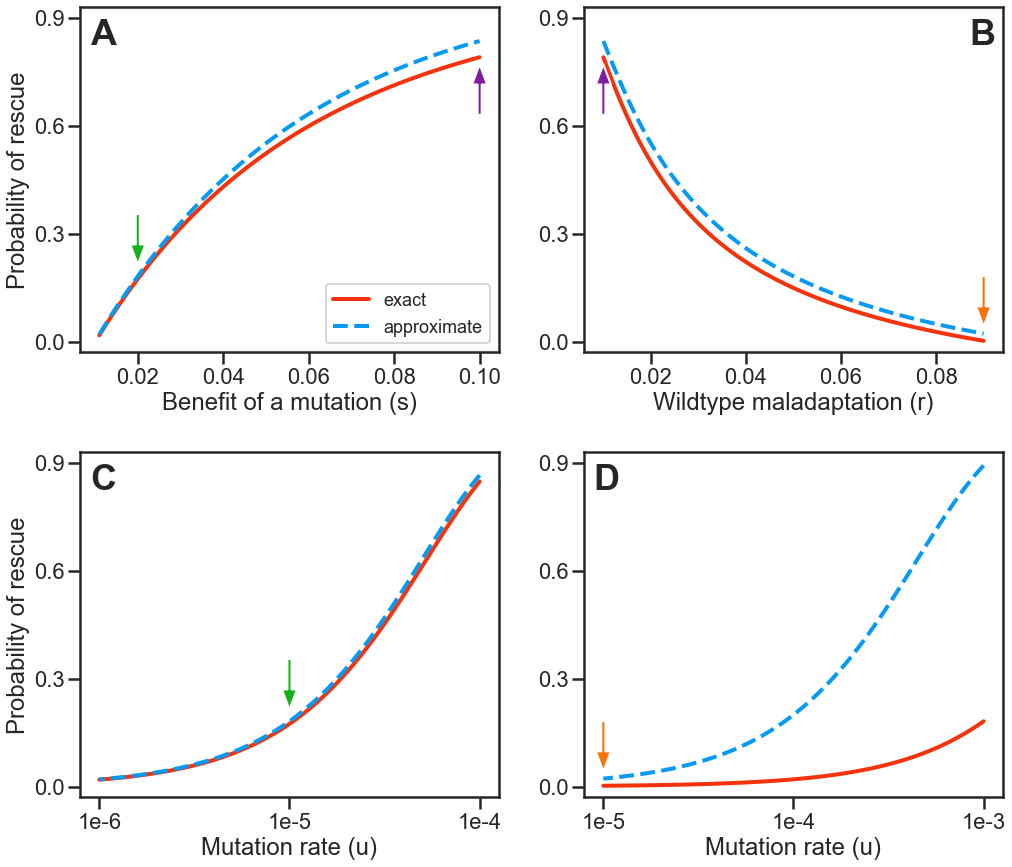

In [9]:
fig = plt.figure(figsize=(14, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
axs = [ax1, ax2, ax3, ax4]
pp = [p1, p2, p3, p4]
aa = [a1, a2, a3, a4]
xx = [ss, rr, logu, logu2]
labs = ['A', 'B', 'C', 'D']
xlabs = ['Benefit of a mutation (s)', 'Wildtype maladaptation (r)', 'Mutation rate (u)', 'Mutation rate (u)']
xcoord = [.009, .087, -6.05, -5.05]
ax1.set_position([.08, .59 , .415, .40])
ax2.set_position([.58, .59 , .415, .40])
ax3.set_position([.08, .075, .415, .40])
ax4.set_position([.58, .075, .415, .40])
for i in range(4):
    axs[i].set_xlabel(xlabs[i])
    axs[i].set_ylim(-.03, .93)
    axs[i].set_yticks([0, .3, .6, .9])
    axs[i].plot(xx[i], pp[i], color=sns.xkcd_rgb['vermillion'], label='exact', lw=4)
    axs[i].plot(xx[i], aa[i], '--', color=sns.xkcd_rgb['azure'], label='approximate', lw=4)
    axs[i].text(xcoord[i], .897, labs[i], size=36, ha='left', va='top', weight='bold')
    if i in [0, 2]:
        axs[i].set_ylabel('Probability of rescue')
ax3.set_xticks([-6, -5, -4])
ax3.set_xticklabels(['1e-6', '1e-5', '1e-4'])
ax4.set_xticks([-5, -4, -3])
ax4.set_xticklabels(['1e-5', '1e-4', '1e-3'])
ax1.annotate('', xy=(.1, p1[-1]-.02), xytext=(.1, p1[-1]-.16), 
    arrowprops=dict(facecolor=sns.xkcd_rgb['purple'], headwidth=15, headlength=20))
ax2.annotate('', xy=(.01, p2[0]-.02), xytext=(.01, p2[0]-.16), 
    arrowprops=dict(facecolor=sns.xkcd_rgb['purple'], headwidth=15, headlength=20))
ax1.annotate('', xy=(.02, p1[9]+.04), xytext=(.02, p1[9]+.18),
    arrowprops=dict(facecolor=sns.xkcd_rgb['green'], headwidth=15, headlength=20))
ax3.annotate('', xy=(-5, p3[50]+.04), xytext=(-5, p3[50]+.18),
    arrowprops=dict(facecolor=sns.xkcd_rgb['green'], headwidth=15, headlength=20))
ax2.annotate('', xy=(.09, p2[-1]+.04), xytext=(.09, p2[-1]+.18),
    arrowprops=dict(facecolor=sns.xkcd_rgb['orange'], headwidth=15, headlength=20))
ax4.annotate('', xy=(-5, p4[-1]+.04), xytext=(-5, p4[-1]+.18),
    arrowprops=dict(facecolor=sns.xkcd_rgb['orange'], headwidth=15, headlength=20))
ax1.legend(loc=4, fontsize=18)
fig.savefig('probrescue.pdf')

In [13]:
!open probrescue.pdf

## Calculations at the end of section 2

Using the parameters of Figure 1D $(W_0=10^4, B_0=0, r = 0.09, s = 0.1)$ and $u=10^{-3}$.

### Exact probability of rescue

In [10]:
W0 = 1e4
r = 0.09
s = 0.1
u = 1e-3
prob_rescue(W0, 0, r, s, u, 100)

0.1811967005526014

### Approximate probability of rescue

In [11]:
approx_prob_rescue_new(W0, r, s, u)

0.8916319767781044

### Improved approximation

If we approximate the probability of fixation as $p_b = 2(s-r-rs)$, replace it in Equation 12, solve for $q_w$ and use the full result without further approximations we get

In [12]:
pw = 2 * u * (1 - r) * (s - r - r * s) / (r + u - r * u)
1 - exp(-pw * W0)

0.1814313379426784